In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
import warnings
np.random.seed(451)
warnings.filterwarnings('ignore') 

test_values = pd.read_csv('test_values.csv')
train_labels = pd.read_csv('train_labels.csv')
train_values = pd.read_csv('train_values.csv')

print('test values: ',test_values.shape)
print('train values: ',train_values.shape)
print('train labels:' ,train_labels.shape)

train = pd.merge(train_values, train_labels, how='inner',on = 'building_id')
print('train merge: ',train.shape)

test values:  (86868, 39)
train values:  (260601, 39)
train labels: (260601, 2)
train merge:  (260601, 40)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

In [4]:
train.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# check for duplicates
idsUnique = len(set(train.building_id))
idsTotal = train.shape[0]
idsDupli = idsTotal - idsUnique
print('ther are ' + str(idsDupli) + ' duplicated IDs for ' + str(idsTotal) + ' total entries')

# check for Null
print('null train',train.isnull().values.any())
print('null test',test_values.isnull().values.any())

ther are 0 duplicated IDs for 260601 total entries
null train False
null test False


### numerical values

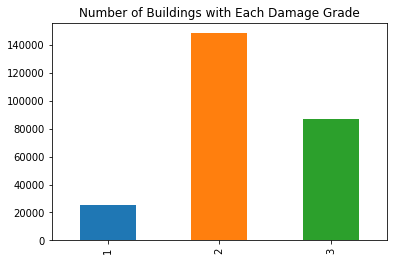

In [6]:
(train_labels.damage_grade
             .value_counts()
             .sort_index()
             .plot.bar(title="Number of Buildings with Each Damage Grade"))

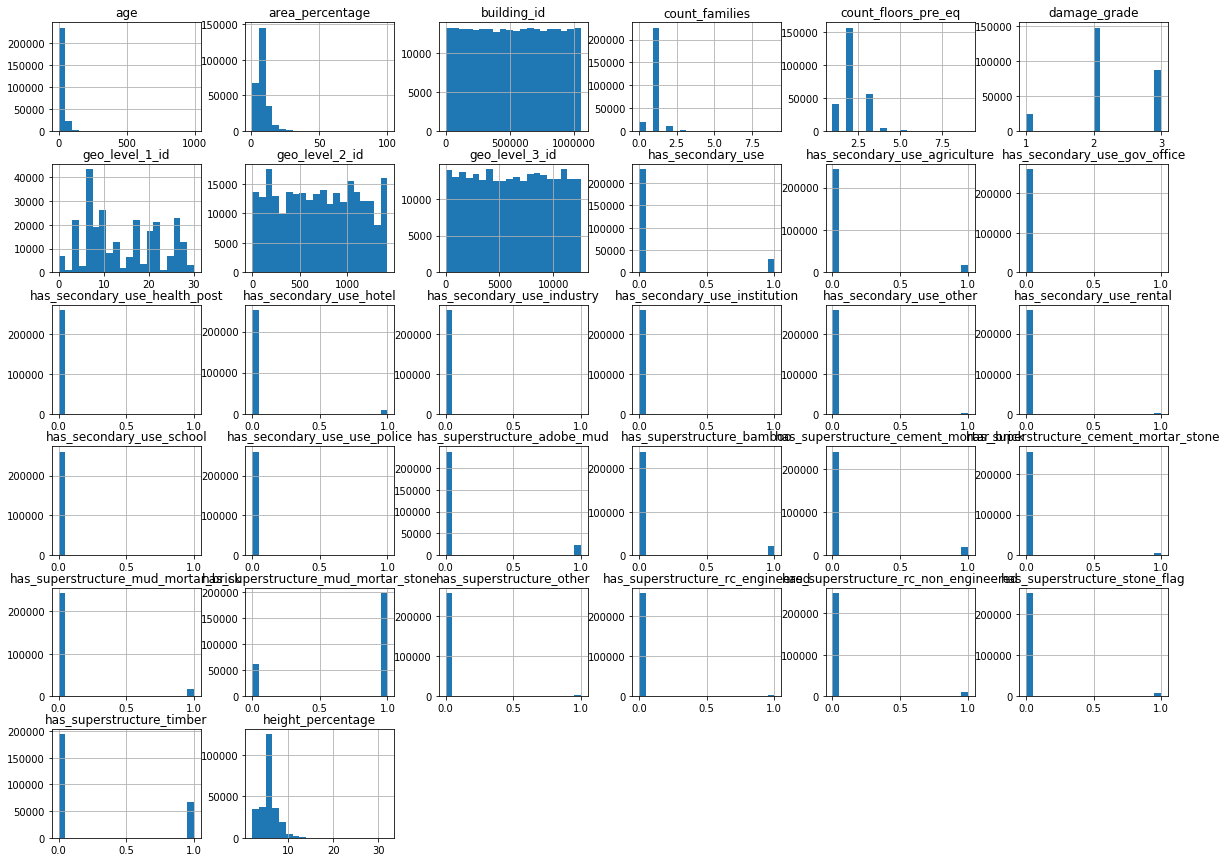

In [7]:
# numeric values
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.hist(bins=20, figsize=(20, 15), layout=(6, 6));

### Univariate Distribution

Text(0.5, 1.0, 'floors distibution')

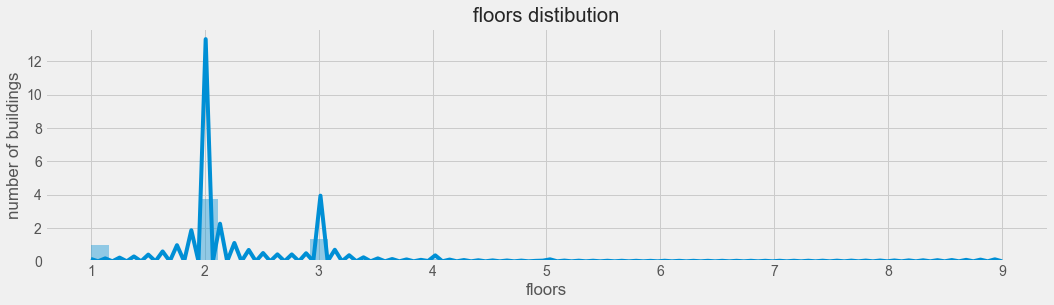

In [27]:
# distribution: count_floors_pre_eq
plt.style.use('fivethirtyeight')
plt.figure(figsize = (16,4))
sns.distplot(train.count_floors_pre_eq, bins = 50)
plt.ticklabel_format(style = 'plain', axis = 'x', scilimits=(0,1))
plt.xlabel('floors')
plt.ylabel('number of buildings')
plt.title('floors distibution')

2    156623
3     55617
1     40441
4      5424
5      2246
6       209
7        39
9         1
8         1
Name: count_floors_pre_eq, dtype: int64


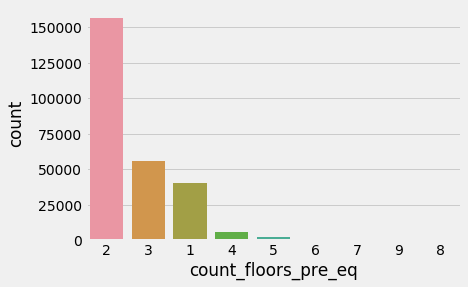

In [10]:
#countplot: count_floors_pre_eq
import seaborn as sns
print(train_values['count_floors_pre_eq'].value_counts())
order = train_values['count_floors_pre_eq'].value_counts(ascending = False).index
sns.countplot(x = 'count_floors_pre_eq',data = train_values, order = order)

Text(0.5, 1.0, 'age distribution')

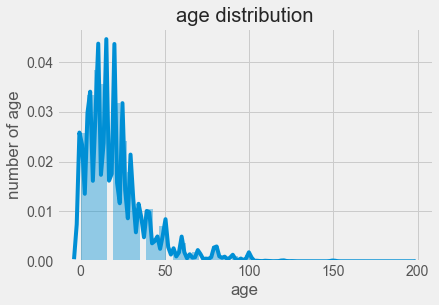

In [28]:
# age distribution in range 0 -200
age = train.loc[(train['age'] < 200)]


plt.style.use('fivethirtyeight')
plt.figure(figsize = (6,4))
sns.distplot(age['age'], bins = 50)
plt.ticklabel_format(style = 'plain', axis = 'x', scilimits=(0,2))
plt.xlabel('age')
plt.ylabel('number of age')
plt.title('age distribution')

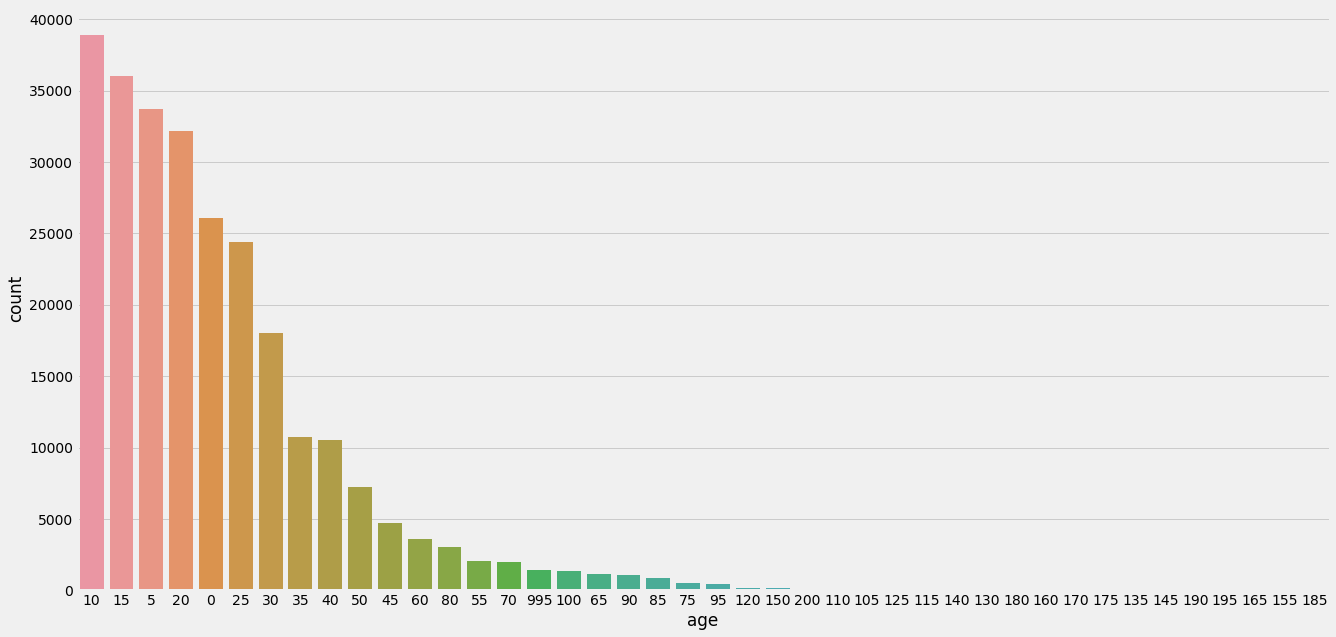

In [12]:
import seaborn as sns
plt.figure(figsize=(20,10))

order = train_values['age'].value_counts(ascending = False).index
sns.countplot(x = 'age',data = train_values, order = order)

Text(0.5, 1.0, 'area percentage distribution')

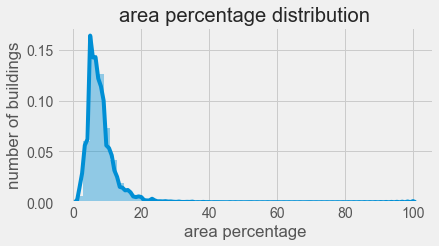

In [30]:
# area_percentage 
plt.style.use('fivethirtyeight')
plt.figure(figsize = (6,3))
sns.distplot(train['area_percentage'], bins = 50)
plt.ticklabel_format(style = 'plain', axis = 'x', scilimits=(0,2))
plt.xlabel('area percentage')
plt.ylabel('number of buildings')
plt.title('area percentage distribution')

Text(0.5, 1.0, 'area percentage distribution')

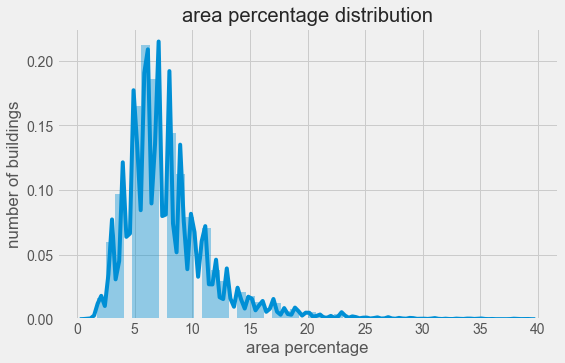

In [32]:
# are_percnetage distribution in range 0-40
area_percentage = train.loc[(train['area_percentage'] < 40)]

plt.style.use('fivethirtyeight')
plt.figure(figsize = (8,5))
sns.distplot(area_percentage['area_percentage'], bins = 50)
plt.ticklabel_format(style = 'plain', axis = 'x', scilimits=(0,2))
plt.xlabel('area percentage')
plt.ylabel('number of buildings')
plt.title('area percentage distribution')

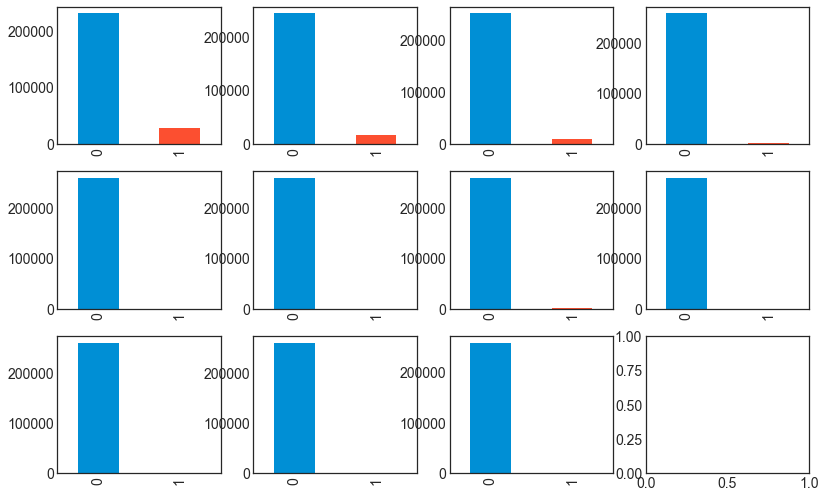

In [15]:
# secondary use features
plt.style.use('seaborn-white')
fig, axarr = plt.subplots(3,4, figsize=(12, 8))
train['has_secondary_use'].value_counts().plot.bar(ax=axarr[0][0])

train['has_secondary_use_agriculture'].value_counts().plot.bar(ax=axarr[0][1])
train['has_secondary_use_hotel'].value_counts().plot.bar(ax=axarr[0][2])
train['has_secondary_use_rental'].value_counts().plot.bar(ax=axarr[0][3])
train['has_secondary_use_institution'].value_counts().plot.bar(ax=axarr[1][0])
train['has_secondary_use_school'].value_counts().plot.bar(ax=axarr[1][1])
train['has_secondary_use_industry'].value_counts().plot.bar(ax=axarr[1][2])
train['has_secondary_use_health_post'].value_counts().plot.bar(ax=axarr[1][3])
train['has_secondary_use_gov_office'].value_counts().plot.bar(ax=axarr[2][0])
train['has_secondary_use_use_police'].value_counts().plot.bar(ax=axarr[2][1])
train['has_secondary_use_other'].value_counts().plot.bar(ax=axarr[2][2])


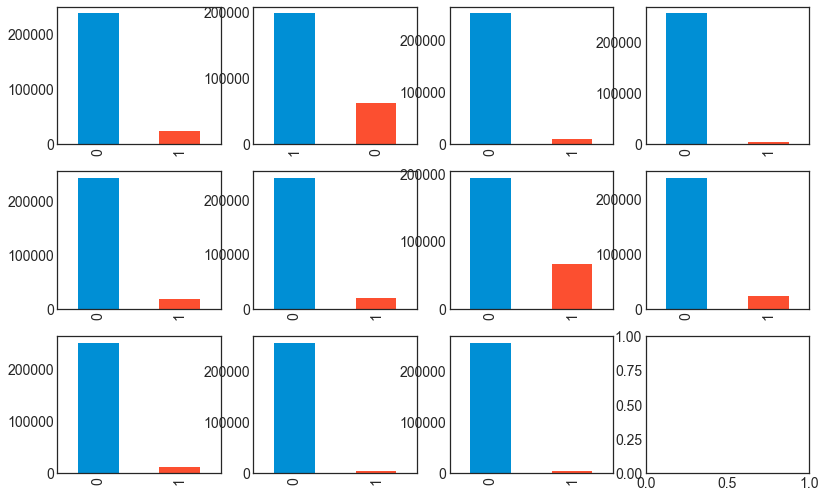

In [16]:
#  has_superstructure
plt.style.use('seaborn-white')
fig, axarr = plt.subplots(3,4, figsize=(12, 8))
train['has_superstructure_adobe_mud'].value_counts().plot.bar(ax=axarr[0][0])

train['has_superstructure_mud_mortar_stone'].value_counts().plot.bar(ax=axarr[0][1])
train['has_superstructure_stone_flag'].value_counts().plot.bar(ax=axarr[0][2])
train['has_superstructure_cement_mortar_stone'].value_counts().plot.bar(ax=axarr[0][3])
train['has_superstructure_mud_mortar_brick'].value_counts().plot.bar(ax=axarr[1][0])
train['has_superstructure_cement_mortar_brick'].value_counts().plot.bar(ax=axarr[1][1])
train['has_superstructure_timber'].value_counts().plot.bar(ax=axarr[1][2])
train['has_superstructure_bamboo'].value_counts().plot.bar(ax=axarr[1][3])
train['has_superstructure_rc_non_engineered'].value_counts().plot.bar(ax=axarr[2][0])
train['has_superstructure_rc_engineered'].value_counts().plot.bar(ax=axarr[2][1])
train['has_superstructure_other'].value_counts().plot.bar(ax=axarr[2][2])


# categorical variable

In [17]:
cat_train = train.select_dtypes(include = ['object']).copy()
cat_train.columns

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

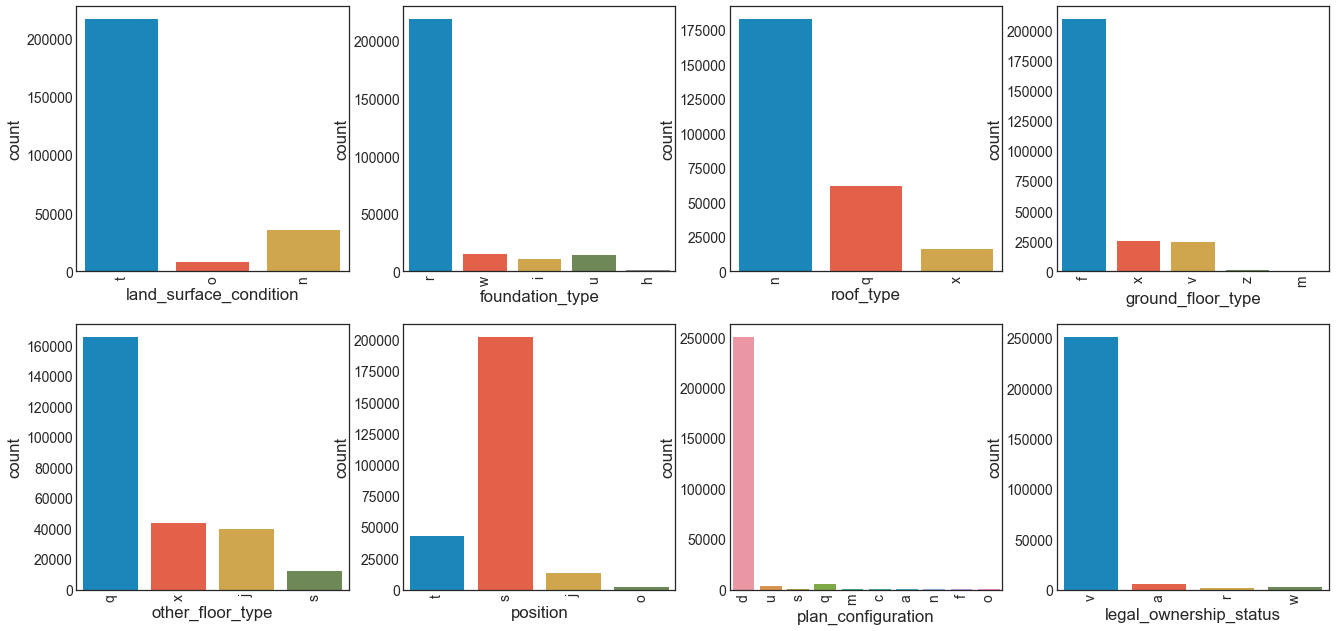

In [18]:

fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(cat_train, ax.flatten()):
    sns.countplot(cat_train[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

# encoding

In [47]:
# Select the numeric columns
numeric_subset = train.select_dtypes('number')


# Select the categorical columns
categorical_subset = train[['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
train_dummy = pd.concat([numeric_subset, categorical_subset], axis = 1)
print(train_dummy.shape)


(260601, 70)


# prediction. baseline

In [48]:
y = train_dummy['damage_grade']
x = train_dummy.drop(['building_id','damage_grade'], axis =1)
print('x',x.shape)
print('y',y.shape)
# x, y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)


print('y_train: ', y_train.shape)
print('X_train: ',X_train.shape)
print('y_test: ', y_test.shape)
print('X_test: ', X_test.shape)

x (260601, 68)
y (260601,)
y_train:  (208480,)
X_train:  (208480, 68)
y_test:  (52121,)
X_test:  (52121, 68)


In [49]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
clf  = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))
print(accuracy_score(y_train, y_pred))

[[ 19603    321     30]
 [   174 117677    921]
 [    28   1283  68443]]
              precision    recall  f1-score   support

           1       0.99      0.98      0.99     19954
           2       0.99      0.99      0.99    118772
           3       0.99      0.98      0.98     69754

   micro avg       0.99      0.99      0.99    208480
   macro avg       0.99      0.98      0.99    208480
weighted avg       0.99      0.99      0.99    208480

0.9867757099002302


In [50]:
y_pred_test = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print(accuracy_score(y_test, y_pred_test))

[[ 2455  2595   120]
 [ 1149 24293  4045]
 [  113  6925 10426]]
              precision    recall  f1-score   support

           1       0.66      0.47      0.55      5170
           2       0.72      0.82      0.77     29487
           3       0.71      0.60      0.65     17464

   micro avg       0.71      0.71      0.71     52121
   macro avg       0.70      0.63      0.66     52121
weighted avg       0.71      0.71      0.71     52121

0.7132249956831219


# scaling.
compare standard scaling and minmax scaling on three features

In [51]:
# standard scaling

from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
df = X_train[['count_floors_pre_eq', 'height_percentage', 'other_floor_type_j']]
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['count_floors_pre_eq', 'height_percentage', 'other_floor_type_j'])


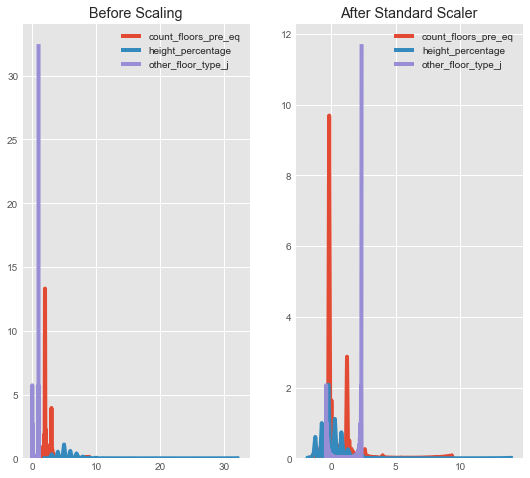

In [52]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 8))

ax1.set_title('Before Scaling')
sns.kdeplot(df['count_floors_pre_eq'], ax=ax1)
sns.kdeplot(df['height_percentage'], ax=ax1)
sns.kdeplot(df['other_floor_type_j'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(scaled_df['count_floors_pre_eq'], ax=ax2)
sns.kdeplot(scaled_df['height_percentage'], ax=ax2)
sns.kdeplot(scaled_df['other_floor_type_j'], ax=ax2)


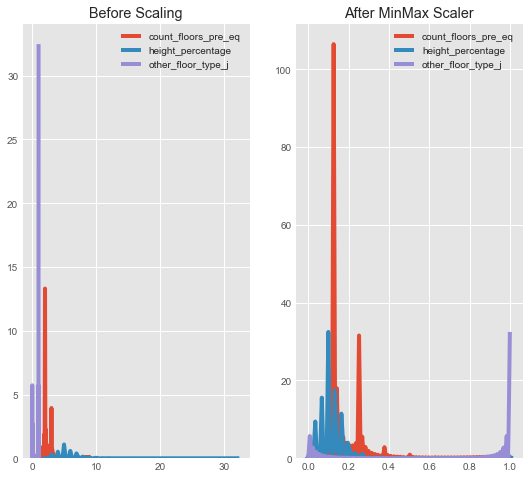

In [53]:
# minmax scaler


scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['count_floors_pre_eq', 'height_percentage', 'other_floor_type_j'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 8))
ax1.set_title('Before Scaling')
sns.kdeplot(df['count_floors_pre_eq'], ax=ax1)
sns.kdeplot(df['height_percentage'], ax=ax1)
sns.kdeplot(df['other_floor_type_j'], ax=ax1)
ax2.set_title('After MinMax Scaler')
sns.kdeplot(scaled_df['count_floors_pre_eq'], ax=ax2)
sns.kdeplot(scaled_df['height_percentage'], ax=ax2)
sns.kdeplot(scaled_df['other_floor_type_j'], ax=ax2)

In [54]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
# prediction on scaled data
clf  = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_scaled, y_train)
y_pred_test = clf.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred_test))


0.7141843019128566


# feature selection

# k -best

In [58]:
# k-best, chi2

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features
best_column =featureScores.nlargest(10,'Score')
print()
print('best columns chi2: ',best_column.Specs.values)

                                     Specs          Score
1                           geo_level_2_id  101928.938958
2                           geo_level_3_id   66699.198686
4                                      age   62369.928203
43                     ground_floor_type_v   25757.831356
40                             roof_type_x   22146.731196
34                       foundation_type_i   22002.394382
0                           geo_level_1_id   19647.855819
12  has_superstructure_cement_mortar_brick   15157.335845
48                      other_floor_type_s   14668.376103
16        has_superstructure_rc_engineered   11387.238389

best columns chi2:  ['geo_level_2_id' 'geo_level_3_id' 'age' 'ground_floor_type_v'
 'roof_type_x' 'foundation_type_i' 'geo_level_1_id'
 'has_superstructure_cement_mortar_brick' 'other_floor_type_s'
 'has_superstructure_rc_engineered']


In [61]:
# k-best , f_classif
fvalue_selector = SelectKBest(f_classif, k=10)
fit = fvalue_selector.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))
print()
a = featureScores.nlargest(10,'Score')
a.Specs.values

                                     Specs         Score
35                       foundation_type_r  18920.030038
43                     ground_floor_type_v  16461.713933
40                             roof_type_x  13313.600933
8      has_superstructure_mud_mortar_stone  13003.104997
34                       foundation_type_i  12882.741955
12  has_superstructure_cement_mortar_brick   8895.287355
48                      other_floor_type_s   8298.215781
41                     ground_floor_type_f   8043.511421
16        has_superstructure_rc_engineered   6124.946381
47                      other_floor_type_q   5849.234683



array(['foundation_type_r', 'ground_floor_type_v', 'roof_type_x',
       'has_superstructure_mud_mortar_stone', 'foundation_type_i',
       'has_superstructure_cement_mortar_brick', 'other_floor_type_s',
       'ground_floor_type_f', 'has_superstructure_rc_engineered',
       'other_floor_type_q'], dtype=object)

# feature importances. random forest

In [65]:
# feature importance
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(feature_imp[:20])
a = feature_imp.to_frame()
print()
a.index[:20]

geo_level_3_id                            0.154043
geo_level_2_id                            0.135313
geo_level_1_id                            0.134357
age                                       0.123084
area_percentage                           0.113436
height_percentage                         0.055169
count_families                            0.024713
count_floors_pre_eq                       0.015944
foundation_type_r                         0.014554
has_superstructure_mud_mortar_stone       0.014521
has_superstructure_timber                 0.011117
ground_floor_type_v                       0.009162
land_surface_condition_t                  0.009114
land_surface_condition_n                  0.008269
ground_floor_type_f                       0.007993
position_s                                0.007946
has_superstructure_adobe_mud              0.007697
has_superstructure_cement_mortar_brick    0.007616
other_floor_type_q                        0.007413
position_t                     

Index(['geo_level_3_id', 'geo_level_2_id', 'geo_level_1_id', 'age',
       'area_percentage', 'height_percentage', 'count_families',
       'count_floors_pre_eq', 'foundation_type_r',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_timber',
       'ground_floor_type_v', 'land_surface_condition_t',
       'land_surface_condition_n', 'ground_floor_type_f', 'position_s',
       'has_superstructure_adobe_mud',
       'has_superstructure_cement_mortar_brick', 'other_floor_type_q',
       'position_t'],
      dtype='object')

No handles with labels found to put in legend.


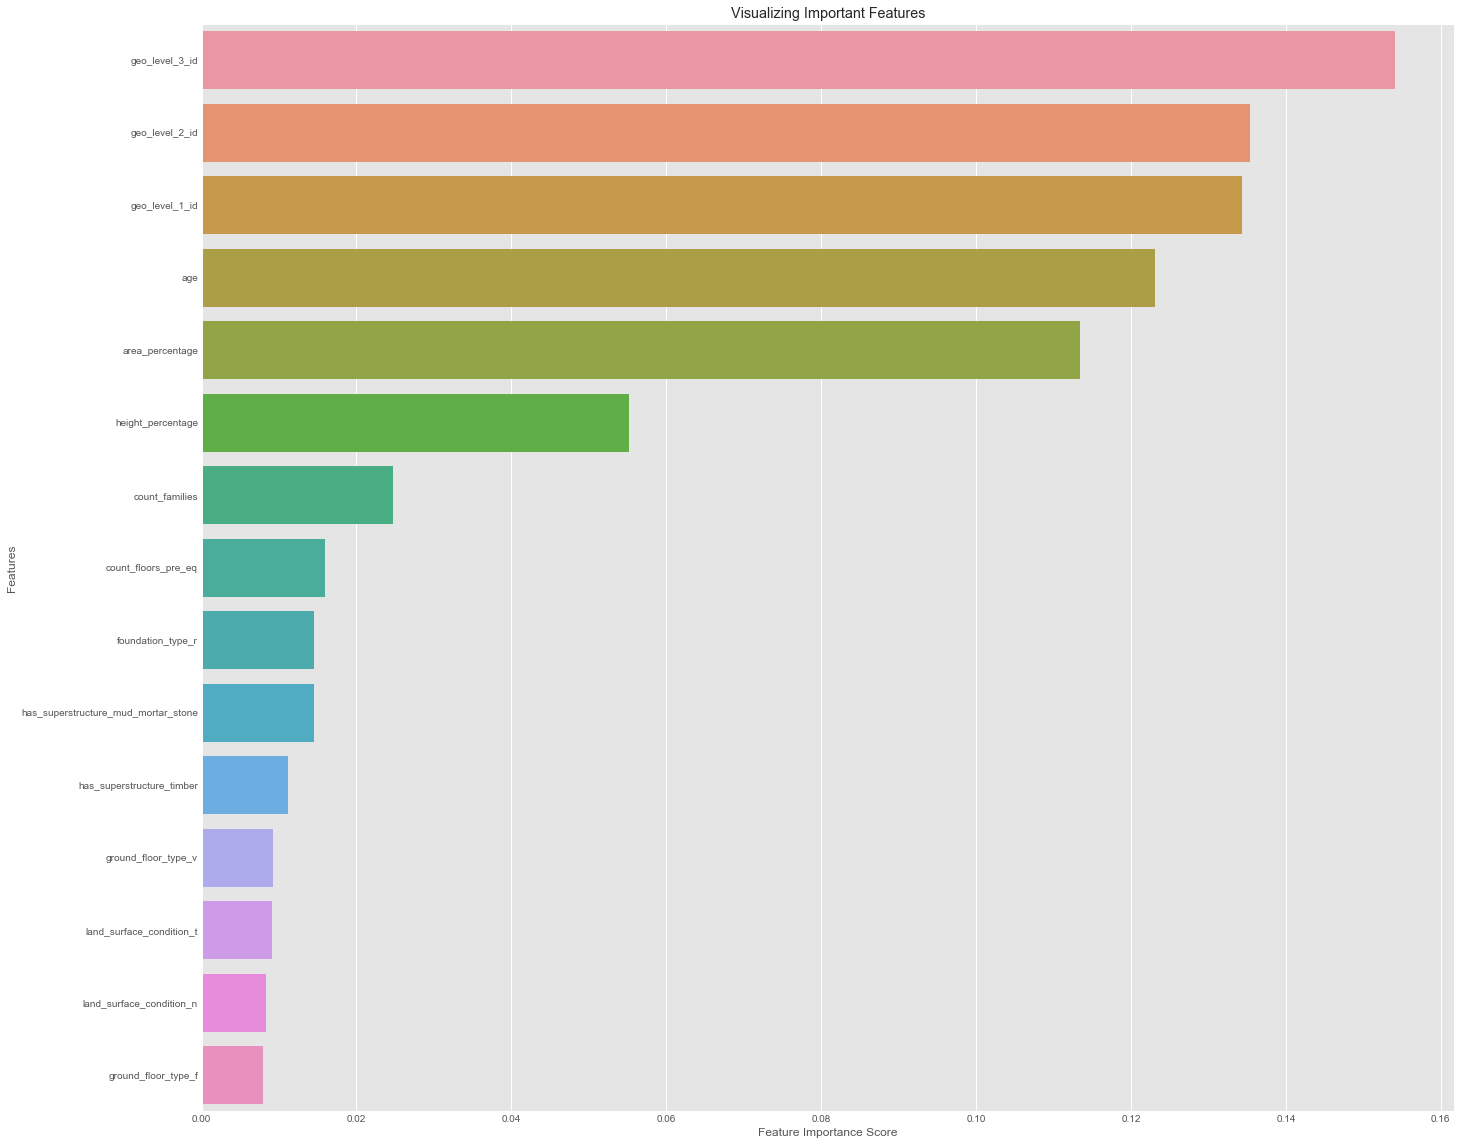

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(20,20))
SEED = 7
# Creating a bar plot
feature_imp_short = feature_imp[:15]
sns.barplot(x=feature_imp_short, y=feature_imp_short.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# PCA

In [69]:
from sklearn.decomposition import PCA

# Create a PCA 
pca = PCA(n_components=40, whiten=True)
X_pca = pca.fit_transform(X_train_scaled)
print('Original number of features:', X_train_scaled.shape[1])
print('Reduced number of features:', X_pca.shape[1])
explained_variance = pca.explained_variance_ratio_
print('exaplained varince:', explained_variance)
print('-----------------------')
print('exaplained_variance_sum:',explained_variance.sum())

Original number of features: 68
Reduced number of features: 40
exaplained varince: [0.0889538  0.04977204 0.03553028 0.03154031 0.03015053 0.02898165
 0.02738212 0.02543657 0.0243052  0.02358833 0.02148484 0.01993671
 0.01883471 0.01748389 0.0165407  0.01595314 0.01558795 0.01552897
 0.01537824 0.01521093 0.01504648 0.01494692 0.01491522 0.01488789
 0.01480785 0.01475202 0.01473758 0.01470721 0.0146844  0.01466073
 0.0146335  0.01460438 0.01459203 0.01447221 0.01446916 0.01435762
 0.01421829 0.01408104 0.01400957 0.01396974]
-----------------------
exaplained_variance_sum: 0.8291347417449766


In [70]:
import math

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print ("Features by importance:\n", important_features)

get_important_features(X_pca, pca.components_, X_train.columns.values)


Features by importance:
 [(2.406217874544574, 'count_floors_pre_eq'), (2.2323526635215987, 'height_percentage'), (2.0373375642427614, 'other_floor_type_j'), (1.9954622793710037, 'roof_type_x'), (1.9634816041106766, 'ground_floor_type_v'), (1.9322074939028717, 'foundation_type_r'), (1.8962163281573032, 'other_floor_type_s'), (1.7889280947467294, 'foundation_type_i'), (1.7336742688143516, 'other_floor_type_q'), (1.6291717638073244, 'ground_floor_type_f'), (1.5712248781864318, 'has_superstructure_mud_mortar_stone'), (1.5115493568685117, 'has_superstructure_cement_mortar_brick'), (1.3796096981390726, 'position_s'), (1.233205233861672, 'foundation_type_w'), (1.2033543620899707, 'has_superstructure_rc_engineered'), (1.1481782154633084, 'area_percentage'), (1.1340855528527782, 'has_superstructure_rc_non_engineered'), (1.0968559951292836, 'foundation_type_u'), (1.0941235645782525, 'position_j'), (0.9896119178309849, 'has_superstructure_mud_mortar_brick'), (0.9692610106706144, 'legal_ownership_

# compare feature selection methods

random forest / train
with different sets of features

In [71]:
# k-best, chi2
chi2_train = X_train[['geo_level_2_id', 'age', 'geo_level_3_id', 'ground_floor_type_v',
       'roof_type_x', 'foundation_type_i', 'geo_level_1_id',
       'has_superstructure_cement_mortar_brick', 'other_floor_type_s',
       'has_superstructure_rc_engineered']]
chi2_test = X_test[['geo_level_2_id', 'age', 'geo_level_3_id', 'ground_floor_type_v',
       'roof_type_x', 'foundation_type_i', 'geo_level_1_id',
       'has_superstructure_cement_mortar_brick', 'other_floor_type_s',
       'has_superstructure_rc_engineered']]
# # k-best, f-class
f_class_train = X_train[['foundation_type_r', 'ground_floor_type_v', 'roof_type_x',
       'has_superstructure_mud_mortar_stone', 'foundation_type_i',
       'has_superstructure_cement_mortar_brick', 'other_floor_type_s',
       'ground_floor_type_f', 'has_superstructure_rc_engineered',
       'other_floor_type_q']]
f_class_test = X_test[['foundation_type_r', 'ground_floor_type_v', 'roof_type_x',
       'has_superstructure_mud_mortar_stone', 'foundation_type_i',
       'has_superstructure_cement_mortar_brick', 'other_floor_type_s',
       'ground_floor_type_f', 'has_superstructure_rc_engineered',
       'other_floor_type_q']]
# feature importance
importance_train = X_train[[ 'geo_level_3_id', 'geo_level_1_id', 'geo_level_2_id', 'age',
       'area_percentage', 'height_percentage', 'count_families',
       'count_floors_pre_eq', 'has_superstructure_mud_mortar_stone',
       'foundation_type_r', 'has_superstructure_timber', 'ground_floor_type_v',
       'land_surface_condition_t', 'land_surface_condition_n',
       'ground_floor_type_f', 'position_s', 'has_superstructure_adobe_mud',
       'roof_type_x', 'has_superstructure_cement_mortar_brick', 'position_t']]
importance_test = X_test[[ 'geo_level_3_id', 'geo_level_1_id', 'geo_level_2_id', 'age',
       'area_percentage', 'height_percentage', 'count_families',
       'count_floors_pre_eq', 'has_superstructure_mud_mortar_stone',
       'foundation_type_r', 'has_superstructure_timber', 'ground_floor_type_v',
       'land_surface_condition_t', 'land_surface_condition_n',
       'ground_floor_type_f', 'position_s', 'has_superstructure_adobe_mud',
       'roof_type_x', 'has_superstructure_cement_mortar_brick', 'position_t']]
# PCA
PCA_train = X_train[['count_floors_pre_eq', 'height_percentage', 'other_floor_type_j',
                     'roof_type_x', 'ground_floor_type_v',
                     'foundation_type_r', 'other_floor_type_s', 'foundation_type_i', 
                     'other_floor_type_q','ground_floor_type_f', 
                     'has_superstructure_mud_mortar_stone',
                     'has_superstructure_cement_mortar_brick',
                     'foundation_type_w', 'position_s', 'foundation_type_w', 
                     'foundation_type_w', 'position_j']]
PCA_test = X_test[['count_floors_pre_eq', 'height_percentage', 'other_floor_type_j',
                     'roof_type_x', 'ground_floor_type_v',
                     'foundation_type_r', 'other_floor_type_s', 'foundation_type_i', 
                     'other_floor_type_q','ground_floor_type_f', 
                     'has_superstructure_mud_mortar_stone',
                     'has_superstructure_cement_mortar_brick',
                     'foundation_type_w', 'position_s', 'foundation_type_w', 
                     'foundation_type_w', 'position_j']]

# train

In [74]:
scaler = StandardScaler()

chi2_train_scaled = scaler.fit_transform(chi2_train)
chi2_test_scaled = scaler.transform(chi2_test)
clf_chi2  = RandomForestClassifier(n_estimators=100)
clf_chi2.fit(chi2_train_scaled, y_train)
y_pred_chi2 = clf_chi2.predict(chi2_test_scaled)
print('chi2: ', accuracy_score(y_test, y_pred_chi2))

chi2:  0.7003511060800829


In [75]:
f_class_train_scaled = scaler.fit_transform(f_class_train)
f_class_test_scaled = scaler.transform(f_class_test)
clf_f  = RandomForestClassifier(n_estimators=100)
clf_f.fit(f_class_train_scaled, y_train)
y_pred_f = clf_f.predict(f_class_test_scaled)
print('f-class: ',accuracy_score(y_test, y_pred_f))

f-class:  0.5747395483586271


In [78]:
importance_train_scaled = scaler.fit_transform(importance_train)
importance_test_scaled = scaler.transform(importance_test)

clf_fim  = RandomForestClassifier(n_estimators=100)
clf_fim.fit(importance_train_scaled, y_train)
y_pred_fim = clf_fim.predict(importance_test_scaled)

print('feature importance: ',accuracy_score(y_test, y_pred_fim))

feature importance:  0.7125534813223077


In [79]:
PCA_train_scaled = scaler.fit_transform(PCA_train)
PCA_test_scaled = scaler.transform(PCA_test)
clf_PCA  = RandomForestClassifier(n_estimators=100)
clf_PCA.fit(PCA_train_scaled, y_train)
y_pred_PCA = clf_PCA.predict(PCA_test_scaled)
print('PCA: ',accuracy_score(y_test, y_pred_PCA))

PCA:  0.5791139847662171


# compare Machine learning algorithms.

KNN -> 0.6337752537364978

SVC -> 0.5715738378005026

XGBoost -> 0.6708236603288502

Random forest. score: 0.7125534813223077 -> best score

In [80]:
from sklearn import neighbors, datasets, preprocessing
knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(importance_train_scaled, y_train)
y_pred_knn = knn.predict(importance_test_scaled)

print('KNN accuracy score: ',accuracy_score(y_test, y_pred_knn))

KNN accuracy score:  0.6337752537364978


In [82]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

svc = OneVsRestClassifier(LinearSVC(random_state=0))
svc.fit(importance_train_scaled, y_train)
y_pred_SVC = svc.predict(importance_test_scaled)
print('SVC accuracy score: ',accuracy_score(y_test, y_pred_SVC))

SVC accuracy score:  0.5715738378005026


In [85]:

import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb_model.fit(importance_train_scaled, y_train)

y_pred_XGB = xgb_model.predict(importance_test_scaled)
print('XGBOOST score: ', accuracy_score(y_test, y_pred_XGB))

XGBOOST score:  0.6708236603288502


# Random forest tuning

### data preparation.

reducing dataset for Randomized Search CV

In [86]:
train = pd.merge(train_values, train_labels, how='inner',on = 'building_id')
train_fraction = train.sample(frac = 0.01)
# Select the numeric columns
numeric_subset_fr = train_fraction.select_dtypes('number')


# Select the categorical columns
categorical_subset_fr = train_fraction[['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']]

# One hot encode
categorical_subset_fr = pd.get_dummies(categorical_subset_fr)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
train_dummy_fr = pd.concat([numeric_subset_fr, categorical_subset_fr], axis = 1)
print(train_dummy_fr.shape)

y_fr = train_dummy_fr['damage_grade']
x_fr = train_dummy_fr.drop(['building_id','damage_grade'], axis =1)

X_train_fr, X_test_fr, y_train_fr, y_test_fr = train_test_split(x_fr, y_fr, test_size = 0.20, random_state = 42)


print('y_train: ', y_train_fr.shape)
print('X_train: ',X_train_fr.shape)
print('y_test: ', y_test_fr.shape)
print('X_test: ', X_test_fr.shape)

(2606, 67)
y_train:  (2084,)
X_train:  (2084, 65)
y_test:  (522,)
X_test:  (522, 65)


In [87]:
importance_train_fr = X_train_fr[[ 'geo_level_3_id', 'geo_level_1_id', 'geo_level_2_id', 'age',
       'area_percentage', 'height_percentage', 'count_families',
       'count_floors_pre_eq', 'has_superstructure_mud_mortar_stone',
       'foundation_type_r', 'has_superstructure_timber', 'ground_floor_type_v',
       'land_surface_condition_t', 'land_surface_condition_n',
       'ground_floor_type_f', 'position_s', 'has_superstructure_adobe_mud',
       'roof_type_x', 'has_superstructure_cement_mortar_brick', 'position_t']]
importance_test_fr = X_test_fr[[ 'geo_level_3_id', 'geo_level_1_id', 'geo_level_2_id', 'age',
       'area_percentage', 'height_percentage', 'count_families',
       'count_floors_pre_eq', 'has_superstructure_mud_mortar_stone',
       'foundation_type_r', 'has_superstructure_timber', 'ground_floor_type_v',
       'land_surface_condition_t', 'land_surface_condition_n',
       'ground_floor_type_f', 'position_s', 'has_superstructure_adobe_mud',
       'roof_type_x', 'has_superstructure_cement_mortar_brick', 'position_t']]

In [88]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [90]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(importance_train_fr, y_train_fr)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   37.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.4min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [91]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [92]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
clf  = RandomForestClassifier(n_estimators = 1400,
 min_samples_split= 5,
 min_samples_leaf= 4,
 max_features = 'sqrt',                             
 max_depth= 80,
 bootstrap=True)
clf.fit(importance_train_scaled, y_train)
y_pred_test = clf.predict(importance_test_scaled)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print(accuracy_score(y_test, y_pred_test))

[[ 2107  3021    42]
 [  733 25699  3055]
 [   62  7461  9941]]
              precision    recall  f1-score   support

           1       0.73      0.41      0.52      5170
           2       0.71      0.87      0.78     29487
           3       0.76      0.57      0.65     17464

   micro avg       0.72      0.72      0.72     52121
   macro avg       0.73      0.62      0.65     52121
weighted avg       0.73      0.72      0.71     52121

0.7242186450758811
